# Einfaches Neuronales Netz für Ziffernerkennung mit MNIST-Datensatz

Dies ist der Code mit Erklärungen, es werden keine Python-Kenntnisse vorausgesetzt.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zuerst werden die Python-Bibliotheken pandas, numpy und matplotlib importiert. Bibliotheken sind Erweiterungen zu den Funktionen, die Python schon kann. Pandas wird zur Darstellung, Verarbeitung und Analyse von Daten verwendet. Numpy wird zur Darstellung von Matrizen und zur Berechnung von Operationen auf diesen verwendet. Matplotlib wird zur Visualisierung verwendet. 

In [3]:
data=pd.read_csv("data/mnist_train.csv", header=None)


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=np.array(data)
print(data)

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [6]:
zeilen, spalten=data.shape #m zeilen, n spalten
np.random.shuffle(data)

In [7]:
data_ueberpruefen=data[0:1000].T
label_ueb=data_ueberpruefen[0]
daten_ueb=data_ueberpruefen[1:spalten]

In [8]:
data_trainieren=data[1000:zeilen].T #Y label, X daten
label_train=data_trainieren[0]
daten_train=data_trainieren[1:spalten]
daten_train=daten_train/255
_,zeilen_train=daten_train.shape
print(zeilen_train)

59000


In [9]:
def matrizen_erstellen():
    w1=np.random.rand(16,784)-0.5
    b1=np.random.rand(16,1)-0.5
    w2=np.random.rand(16,16)-0.5
    b2=np.random.rand(16,1)-0.5
    w3=np.random.rand(10,16)-0.5
    b3=np.random.rand(10,1)-0.5
    return w1, b1, w2, b2, w3, b3

In [ ]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

np.float64(0.8807970779778823)

In [11]:
def Abfrage(w1,b1,w2,b2,w3,b3, eingabe):
    z1=w1.dot(eingabe)+b1
    a1=sigmoid(z1)
    z2=w2.dot(a1)+b2
    a2=sigmoid(z2)
    z3=w3.dot(a2)+b3
    a3=sigmoid(z3)
    return z1,a1,z2,a2,z3,a3


In [12]:
def eins_aus_n(eingabe):
    gewuenscht=np.zeros((eingabe.size, eingabe.max()+1))
    gewuenscht[np.arange(eingabe.size),eingabe]=1
    gewuenscht=gewuenscht.T
    return gewuenscht

In [13]:
def ableitung_sigmoid(eingabe):
    return sigmoid(eingabe)*(1-sigmoid(eingabe))
sigmoid(3)

np.float64(0.9525741268224334)

In [14]:
def backpropagation(z1,a1,z2,a2,w2,a3,w3, labels, daten): #wenn fehler, wahrscheinlich hier
    dz3=a3-eins_aus_n(labels)
    dw3=1/zeilen*dz3.dot(a2.T)
    db3=1/zeilen*np.sum(dz3)
    dz2=w3.T.dot(dz3)*ableitung_sigmoid(z2)
    dw2=1/zeilen*dz2.dot(a1.T)
    db2=1/zeilen*np.sum(dz2)
    dz1=w2.T.dot(dz2)*ableitung_sigmoid(z1)
    dw1=1/zeilen*dz1.dot(daten.T)
    db1=1/zeilen*np.sum(dz1)
    return dw1,db1,dw2,db2,dw3,db3

In [15]:
def parameter_aktualisieren(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,lernrate):
    w1=w1-lernrate*dw1
    b1=b1-lernrate*db1
    w2=w2-lernrate*dw2
    b2=b2-lernrate*db2
    w3=w3-lernrate*dw3
    b3=b3-lernrate*db3
    return w1,b1,w2,b2,w3,b3

In [16]:
def vorhersage_machen(a3):
    return np.argmax(a3,0)

In [17]:
def wie_akkurat(vorhersage, label):
    print(vorhersage, label)
    return np.sum(vorhersage==label)/label.size

In [18]:
def gradientenabstieg(daten,label,wiederholungen,lernrate):
    w1,b1,w2,b2,w3,b3=matrizen_erstellen()
    for i in range(wiederholungen):
        z1,a1,z2,a2,z3,a3=Abfrage(w1,b1,w2,b2,w3,b3, daten)
        dw1,db1,dw2,db2,dw3,db3=backpropagation(z1,a1,z2,a2,w2,a3,w3,label,daten)
        w1,b1,w2,b2,w3,b3=parameter_aktualisieren(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,lernrate)
        if i%100==0:
            print("Wiederholungen: ",i)
            print("Accuracy: ", wie_akkurat(vorhersage_machen(a3),label))
    return w1,b1,w2,b2,w3,b3

In [ ]:
w1, b1, w2, b2, w3, b3=gradientenabstieg(daten_train,label_train, 100, 0.1)

Wiederholungen:  0
[2 2 2 ... 2 2 2] [8 0 8 ... 9 9 3]
Accuracy:  0.1266271186440678
[[ 0.40057456 -0.21175527  0.33612448 ...  0.35286681  0.14309132
  -0.15977885]
 [-0.04817231  0.19764074  0.28830266 ... -0.06420765 -0.10603931
  -0.43052945]
 [ 0.01367711 -0.47654372  0.17838135 ... -0.08862758 -0.48439029
  -0.09417964]
 ...
 [-0.49313126  0.12921582  0.47908028 ... -0.4412266   0.48780437
   0.17276048]
 [ 0.34768753  0.34376438  0.16424889 ... -0.3965967   0.39870183
   0.09428025]
 [ 0.3232777   0.22057493  0.47827227 ... -0.252792   -0.15124009
   0.39129206]]


In [20]:
def make_predictions(X, W1, b1, W2, b2, w3, b3):
    _, _, _, _, _, A2 = Abfrage(W1, b1, W2, b2, w3, b3, X)
    predictions = vorhersage_machen(A2)
    return predictions

In [21]:
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = daten_train[:, index, None]
    prediction = make_predictions(daten_train[:, index, None], W1, b1, W2, b2, w3, b3)
    label = label_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


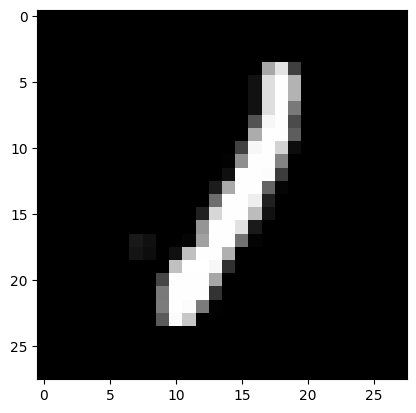

In [22]:
test_prediction(115, w1, b1, w2, b2, w3, b3)

In [23]:
dev_predictions = make_predictions(daten_ueb, w1, b1, w2, b2, w3, b3)
wie_akkurat(dev_predictions, label_ueb)

[3 1 1 3 9 7 3 7 7 2 1 2 1 7 3 1 7 1 3 1 7 7 0 3 3 0 7 4 7 7 0 7 1 7 1 7 1
 7 1 1 7 7 1 3 7 1 9 3 7 7 0 1 0 1 7 9 7 1 2 2 3 0 7 1 0 3 1 7 2 2 1 3 2 1
 1 4 7 9 1 1 7 3 0 0 0 9 0 3 7 7 6 3 2 1 0 2 6 3 0 9 1 0 7 0 2 3 7 3 2 7 0
 1 6 1 7 1 2 0 1 7 7 1 7 0 3 7 7 3 7 1 1 0 7 1 7 1 3 1 0 7 1 4 6 7 1 7 1 0
 3 2 1 7 4 9 7 1 1 3 7 3 0 1 8 1 1 9 7 2 1 0 7 9 7 1 7 1 7 2 3 0 7 3 9 0 0
 7 7 7 7 7 3 1 1 6 7 1 9 3 7 2 1 7 3 7 2 1 9 1 1 9 7 1 7 5 7 0 0 7 7 7 1 2
 4 7 1 3 7 2 1 9 0 2 7 6 2 1 0 2 3 7 1 2 2 1 1 7 2 0 7 1 1 3 7 1 1 3 4 4 3
 9 1 7 7 1 1 7 0 3 0 4 1 0 7 1 0 7 7 0 1 1 0 7 1 7 7 1 9 9 1 2 7 7 2 2 1 3
 8 0 7 0 3 0 7 0 7 1 7 0 7 2 1 3 1 0 1 9 6 1 2 9 2 7 1 2 7 2 1 1 1 7 9 9 9
 3 3 0 1 1 6 7 1 7 0 7 6 1 0 7 0 1 5 0 9 2 1 1 7 7 7 7 3 9 1 1 1 9 1 7 1 7
 1 0 0 7 0 7 0 1 0 0 1 3 7 0 6 3 7 9 7 7 1 3 2 9 1 0 9 2 1 7 3 7 1 8 6 7 0
 7 9 1 7 7 0 3 7 2 0 7 0 7 7 1 2 9 7 7 8 6 7 1 1 3 6 7 0 7 9 7 7 3 7 0 1 7
 1 7 7 6 7 2 7 9 0 7 7 6 2 1 0 1 3 3 2 9 1 2 9 7 6 7 2 1 9 7 1 7 7 7 2 7 0
 9 1 3 1 1 7 1 1 0 7 0 8 

np.float64(0.252)